## What is Clustering Model

Clustering Model is one of the unsupervised machine learning model. It groups "unlabelled" data with its own properties which are decided by the model. Since the clustering is unsupervised learning, the data gonna automatically be grouped by the model.

For example, when we provide pictures of fruits that contain apple, banana, and orange, the clustering model groups them with three labels defined with their properties like colors, shapes, or something we don't know.

### K-Means Clustering

K-means clustering is one of the most popular clustering model in machine learning. K-means clustering is the machine learning model that divides unlabelled data sets into $K$ number of clusters. We'll set the number $K$ which is the number of centroids in the dataset.

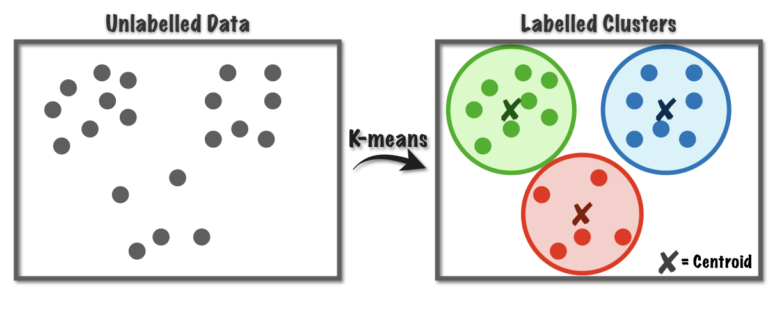

Like the above image, we define the $K$ to 3, then the model divides data into three clusters.

### The Elbow Method

The elbow method is a function to find an optimal $K$ in a K-menas clustering. It uses WCSS (Within-Cluster Sum of Square) funtion which find the sum of the squre distance between points in a cluster and the cluster centroid.

$$
WCSS=\sum_{P_i\ in\ Cluster 1} distance(P_i, C_1)^2 + \sum_{P_i\ in\ Cluster 2} distance(P_i, C_2)^2 + \ldots
$$

## Actual Example

We gonna deep dive into the realistic example with the dataset of customers of mall. The input dataset is the information of 200 customers of the mall which contains Genre, Age, Annual Income, and Spending score. The spending score ranges between 1 to 100 that implies how customers spend on the mall.

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the dataset

In [2]:
dataset = pd.read_csv('../dataset/Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:, [3, 4]].values

Now, we gonna use only annual income and spending score of the dataset. Since we would build 2D clustering graph, we only use these two variables to X.

#### Using Elbow Function

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

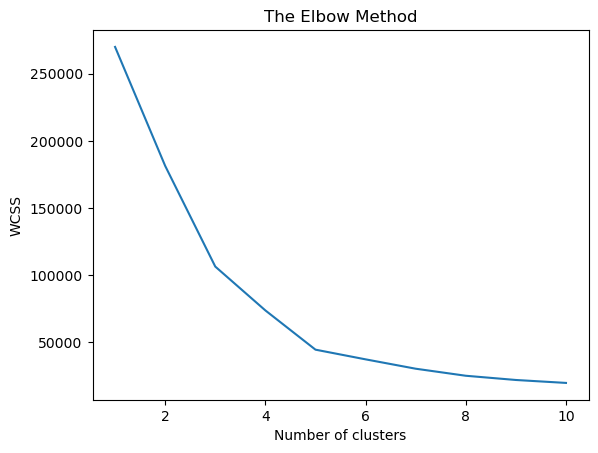

In [4]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In the previous elbow method graph, there is a point where the graph rapidly changes from it. It is called "Elbow Point." The number of clusters from the elbow point will be the $K$ number.

In this example, the $K$ is 5. 

#### Training the K-means model

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(X)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Visualising the results

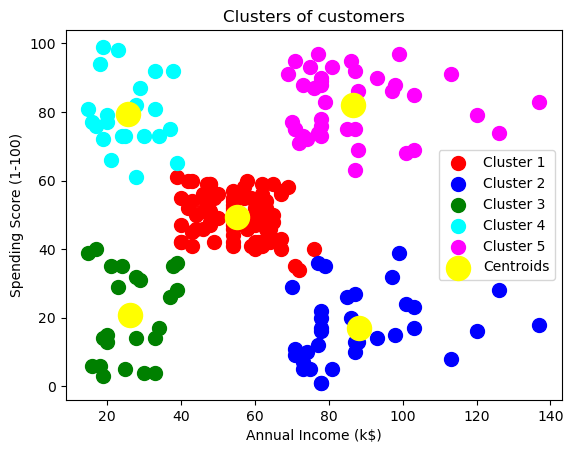

In [6]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

As shown above, we successfully group unlabelled dataset into five clusters. Each cluster is divided with its own color. The big yellow points in the graph are centroids of each clusters.

By running K-means clustering model, we can group customers into five different clusters. The manager of mall can use this information for whom they want to target.